In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from astropy.table import Table, join
from astropy import units as u

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

## Plot CO observation parameters, a la Bolatto et al. (2017) Figure 4.  Note that the 'coobs' table is a simple CSV file, not ECSV.

In [2]:
globaldir = '../dat_glob/'
coobs = Table.read(globaldir+'obs/edge_coobs_de10.csv', format='ascii.csv')

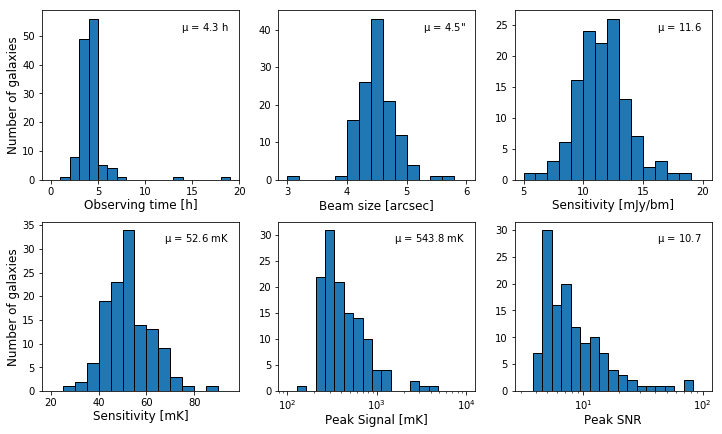

In [3]:
plt.figure(figsize=(12, 7))

ax1=plt.subplot(2,3,1)
plt.hist(coobs['coObstim'], bins=np.arange(0, 20, 1), ec='black')
plt.xlabel('Observing time [h]', labelpad=2, fontsize='large')
plt.ylabel('Number of galaxies', labelpad=2, fontsize='large')
ax1.text(0.95,0.88,'$\mu$ = %3.1f h' % np.mean(coobs['coObstim']),
    ha='right',transform=ax1.transAxes)

ax2=plt.subplot(2,3,2)
beam=np.sqrt(coobs['Bmaj']*coobs['Bmin'])
plt.hist(beam, bins=np.arange(3, 6.2, 0.2), ec='black')
plt.xlabel('Beam size [arcsec]', labelpad=2, fontsize='large')
tick_spacing = 1
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.text(0.95,0.88,'$\mu$ = %3.1f"' % np.mean(beam),
    ha='right', transform=ax2.transAxes)

ax3=plt.subplot(2,3,3)
plt.hist(coobs['coRMS_mJybm'], bins=np.arange(5,21,1), ec='black')
plt.xlabel('Sensitivity [mJy/bm]', labelpad=2, fontsize='large')
ax3.text(0.95,0.88,'$\mu$ = %4.1f' % np.mean(coobs['coRMS_mJybm']),
    ha='right', transform=ax3.transAxes)

ax4=plt.subplot(2,3,4)
plt.hist(coobs['coRMS_mK'], bins=np.arange(20,100,5), ec='black')
plt.xlabel('Sensitivity [mK]', labelpad=2, fontsize='large')
plt.ylabel('Number of galaxies', labelpad=2, fontsize='large')
ax4.text(0.95,0.88,'$\mu$ = %4.1f mK' % np.mean(coobs['coRMS_mK']),
    ha='right', transform=ax4.transAxes)

ax5=plt.subplot(2,3,5)
plt.hist(coobs['coTpk_mK'], bins=np.logspace(2,4,num=20), ec='black')
plt.xlabel('Peak Signal [mK]', labelpad=2, fontsize='large')
ax5.set_xscale("log")
ax5.text(0.95,0.88,'$\mu$ = %4.1f mK' % np.mean(coobs['coTpk_mK']),
    ha='right', transform=ax5.transAxes)

ax6=plt.subplot(2,3,6)
plt.hist(coobs['coSNRpeak'], bins=np.logspace(0.5,2,num=20), ec='black')
plt.xlabel('Peak SNR', labelpad=2, fontsize='large')
ax6.set_xscale("log")
ax6.text(0.95,0.88,'$\mu$ = %4.1f' % np.mean(coobs['coSNRpeak']),
    ha='right', transform=ax6.transAxes)

plt.subplots_adjust(hspace=0.25)
plt.show()

## Plot derived CO masses, a la Bolatto et al. (2017) Figure 5.  Need to merge in two additional tables.

In [11]:
coflux = Table.read(globaldir+'obs/edge_coflux_natv.csv', format='ascii.ecsv')  # Measured CO fluxes
califa = Table.read(globaldir+'external/edge_califa.csv', format='ascii.ecsv')  # CALIFA params incl. distance
db1 = join(coflux, califa, keys='Name')
db  = join(db1, coobs, keys='Name')

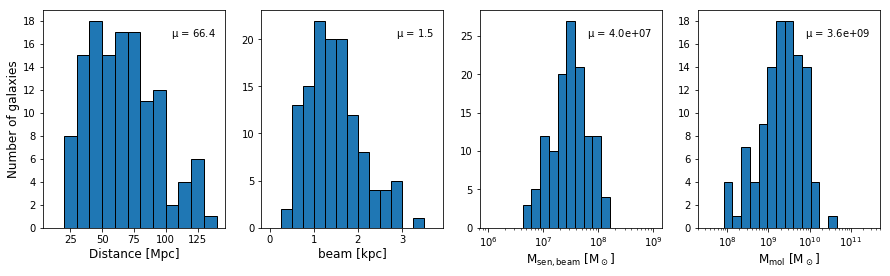

In [44]:
fig=plt.figure(figsize=(15, 4))

ax1=plt.subplot(1,4,1)
plt.hist(db['caDistMpc'],bins=np.arange(10, 150, 10), ec='black')
plt.xlabel('Distance [Mpc]', labelpad=3, fontsize='large')
plt.ylabel('Number of galaxies', labelpad=3, fontsize='large')
tick_spacing = 2
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.text(0.95,0.88,'$\mu$ = %3.1f' % np.mean(db['caDistMpc']),
    ha='right', transform=ax1.transAxes)

ax2=plt.subplot(1,4,2)
beam = (np.sqrt(db['coBmaj_natv']*db['coBmin_natv'])).to(u.rad)
bmkpc = beam.value*db['caDistMpc']*1000.
plt.hist(bmkpc,bins=np.arange(0, 4, 0.25), ec='black')
plt.xlabel('beam [kpc]', labelpad=3, fontsize='large')
ax2.text(0.95,0.88,'$\mu$ = %3.1f' % np.mean(bmkpc),
    ha='right', transform=ax2.transAxes)

ax3=plt.subplot(1,4,3)
# Multiply 10 km/s noise by sqrt(3) to get sensitivity to a 30 km/s line
# Multiply by 4 to get 4-sigma sensitivity
msens = 4*1.05e4*db['caDistMpc']**2*db['coRMS_mJybm']*10.*np.sqrt(3)/1000.
plt.hist(msens,bins=np.logspace(6, 9, num=20), ec='black')
plt.xlabel('$M_{sen,beam}$ [$M_\odot$]', labelpad=3, fontsize='large')
ax3.set_xscale("log")
ax3.text(0.95,0.88,'$\mu$ = %4.1e' % np.mean(msens),
    ha='right', transform=ax3.transAxes)

ax4=plt.subplot(1,4,4)
mgas = 1.05e4*db['caDistMpc']**2*db['coSmooth_natv']
mgas = mgas[~np.isnan(mgas)]
plt.hist(mgas,bins=np.logspace(7.5, 11.5, num=20), ec='black')
plt.xlabel('$M_{mol}$ [$M_\odot$]', labelpad=3, fontsize='large')
ax4.set_xscale("log")
ax4.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax4.text(0.95,0.88,'$\mu$ = %4.1e' % np.mean(mgas),
    ha='right', transform=ax4.transAxes)

plt.show()